# Tarea de muestreo
Se tomará información del siguiente repositorio para realizar la ejecución correcta del notebook:  
* (Edades)  
 
Objetivo del notebook:  
 **Comparar medidas de tendencia central, mínimos y máximos de diferentes muestras tomando como universo los datos del archivo edades**  
El código fué desarrollado en python haciendo uso de los paquetes:
* Pandas, específicamente la funcionalidad de describe que agrega información de número de observaciones, mean, std, min, 25%, 50%, 75%, max
* Matplotlib para visualizar los diferentes histogramas graficando una función de distribución empírica
* numpy para hacer algunas transformaciones de los datos y lo más importante generar las muestras necesarias.  


### Desarrollo de la Tarea

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests


In [3]:
plt.style.use('Solarize_Light2')

In [4]:
restpuesta = requests.get("https://raw.githubusercontent.com/arturoTellez/Deteccion_anomalias_homework/master/tarea_muestreo/edades_1.csv")
edades = restpuesta.text.split("\n")

In [8]:

edades #lista que incluye los saltos de línea
edades = [float(edad.strip()) for edad in edades if edad != ""] # Se usa list comprehention para quitar los saltos de linea
# con el método strip()

### 1 Histógrama de datos 

<ipython-input-9-5e7074ea7f0f>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


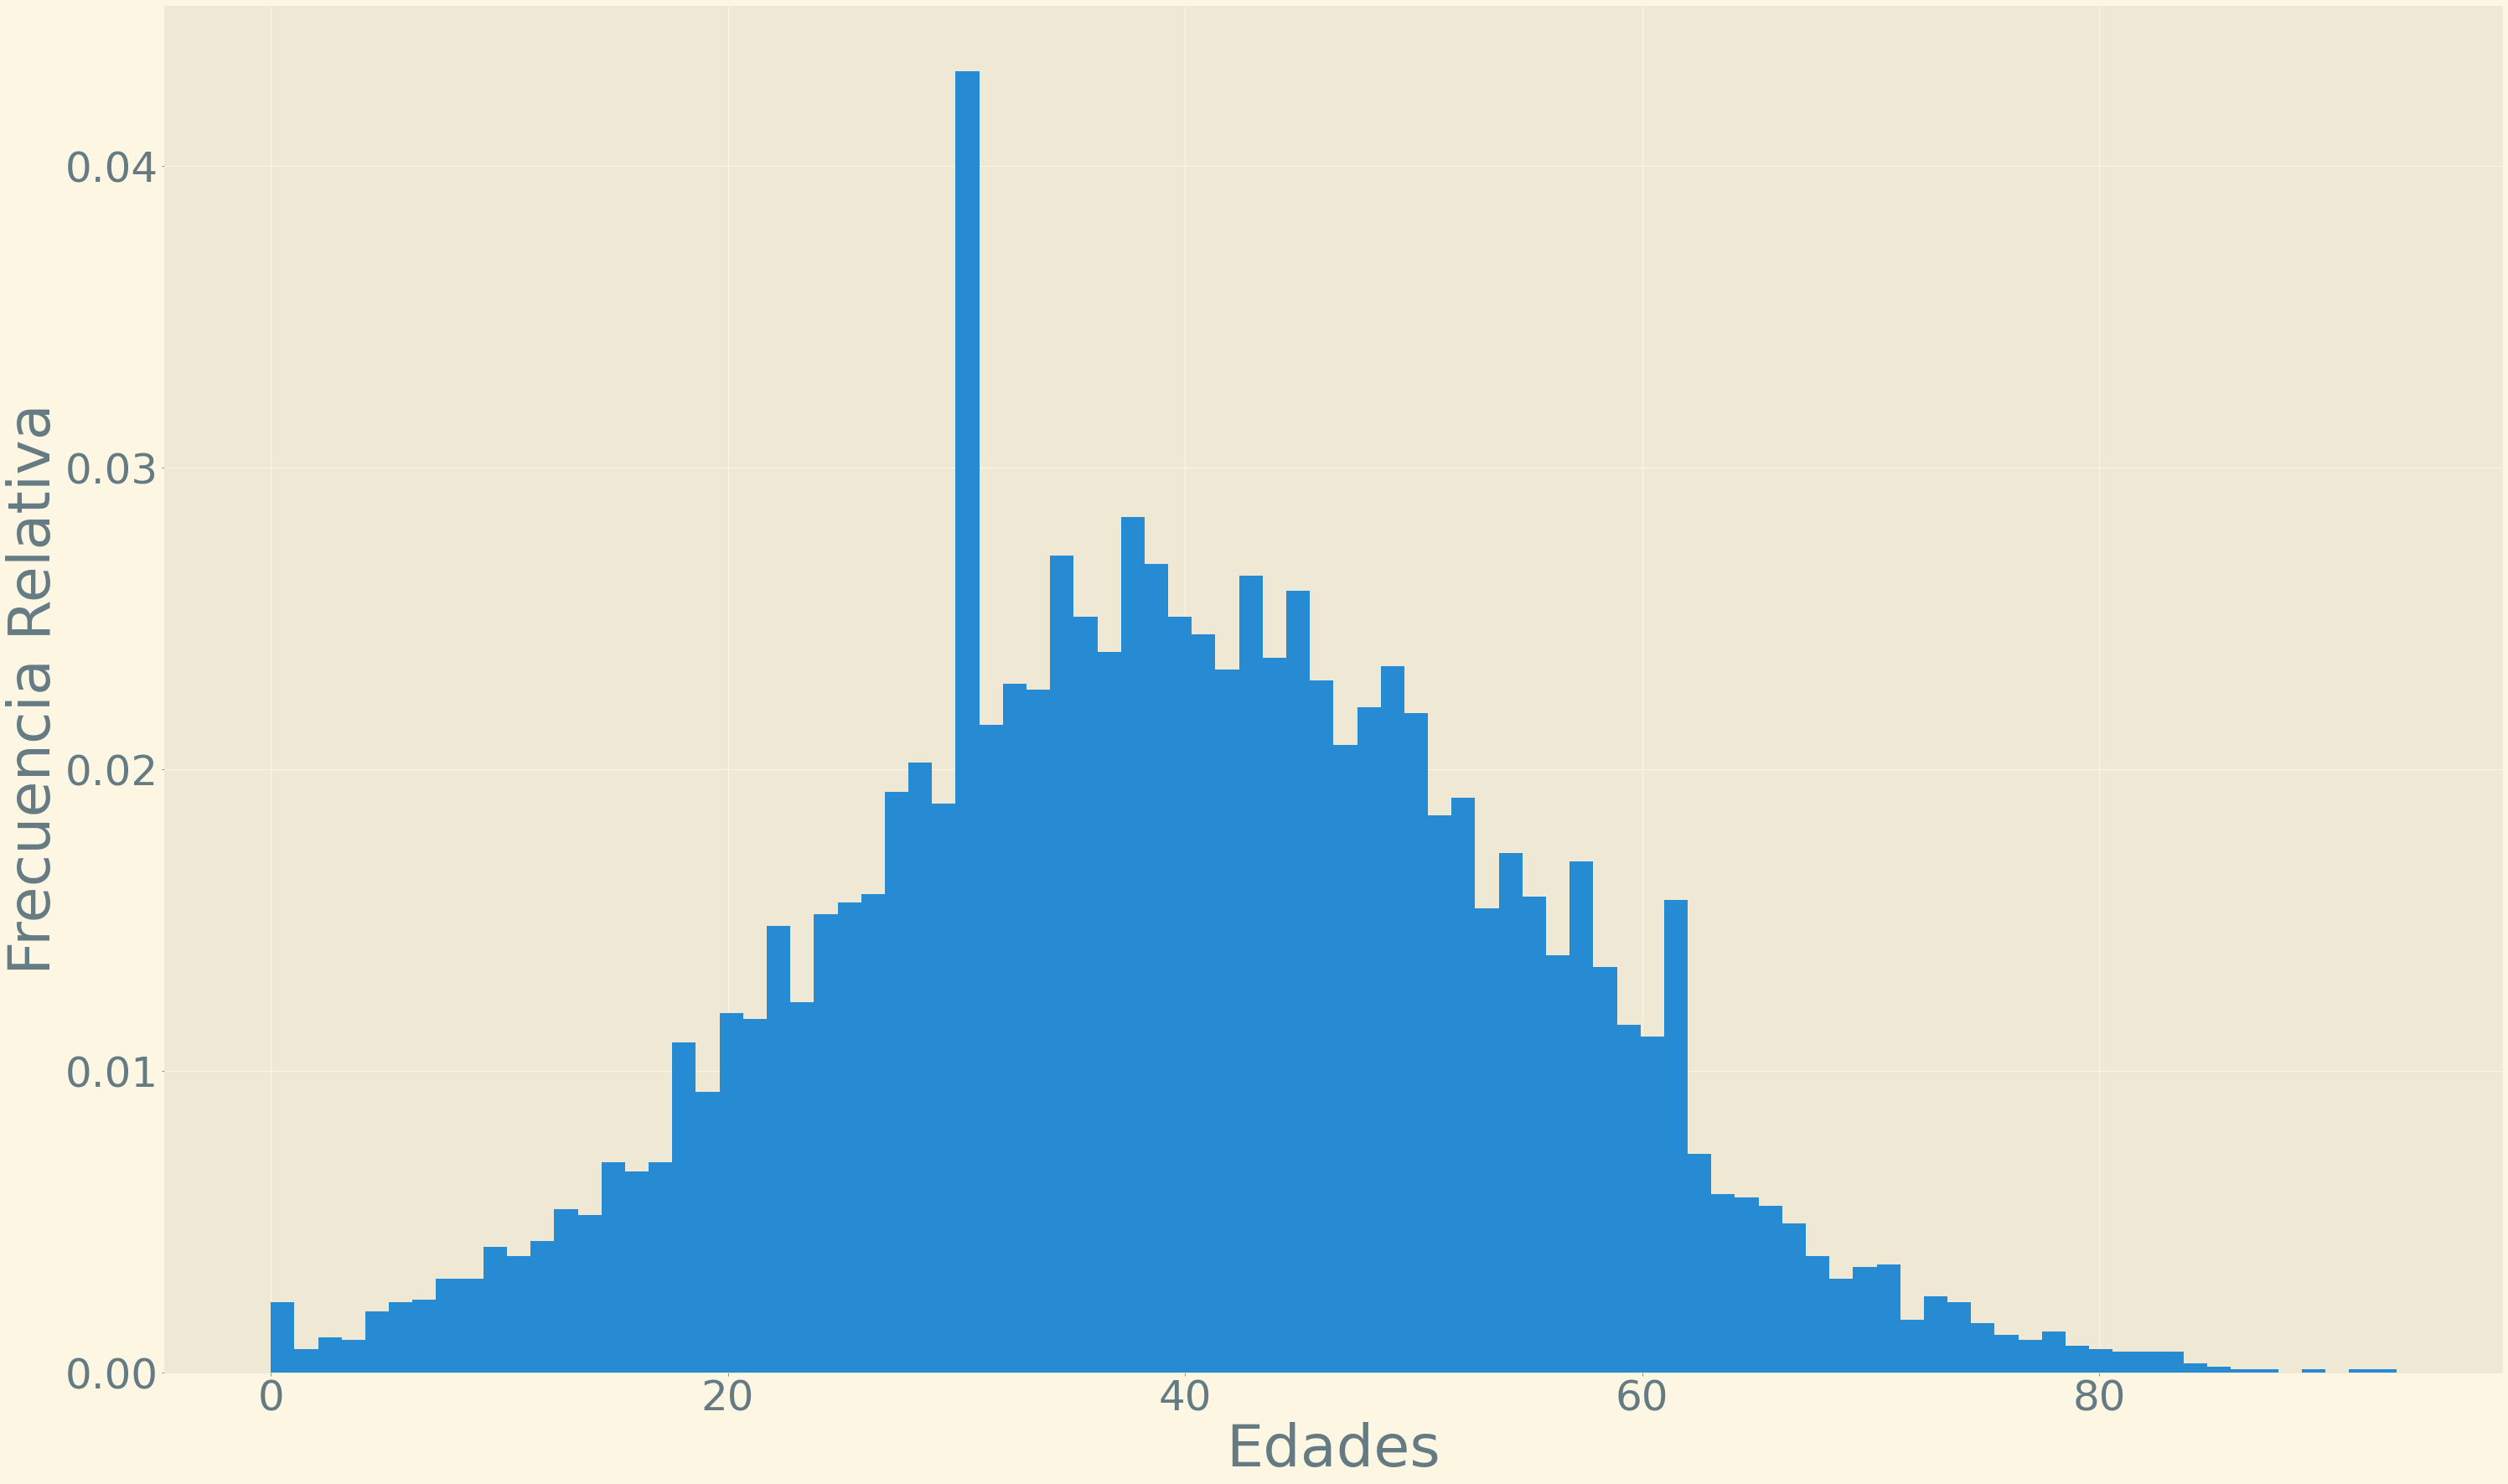

In [9]:
fig = plt.figure(figsize = (50, 30))
plt.hist(edades, bins = 90, density = True);
plt.xlabel("Edades", fontsize = 70)
plt.xticks(fontsize = 50);
plt.ylabel("Frecuencia Relativa", fontsize = 70)
plt.yticks(fontsize = 50);


fig.show();

#### Creación de primer muesta (100 y 1000 datos)

?np.random.choice
choice(a, size=None, replace=True, p=None)  
  
Generates a random sample from a given 1-D array  
  
.. versionadded:: 1.7.0  
  
.. note::  
    New code should use the ``choice`` method of a ``default_rng()``  
    instance instead; please see the :ref:`random-quick-start`.  
  
Parameters  
----------  
a : 1-D array-like or int  
    If an ndarray, a random sample is generated from its elements.  
    If an int, the random sample is generated as if it were ``np.arange(a)``  
size : int or tuple of ints, optional  
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then  
    ``m * n * k`` samples are drawn.  Default is None, in which case a  
    single value is returned.  
replace : boolean, optional  
    Whether the sample is with or without replacement. Default is True,  
    meaning that a value of ``a`` can be selected multiple times.  
p : 1-D array-like, optional  
    The probabilities associated with each entry in a.  
    If not given, the sample assumes a uniform distribution over all  
    entries in ``a``.  
  
Returns  
-------  
samples : single item or ndarray  
    The generated random samples

In [13]:
edades_n100 = np.random.choice(edades, 100, replace = False)           
edades_n1000 = np.random.choice(edades, 100, replace = False)           

#### Comparación

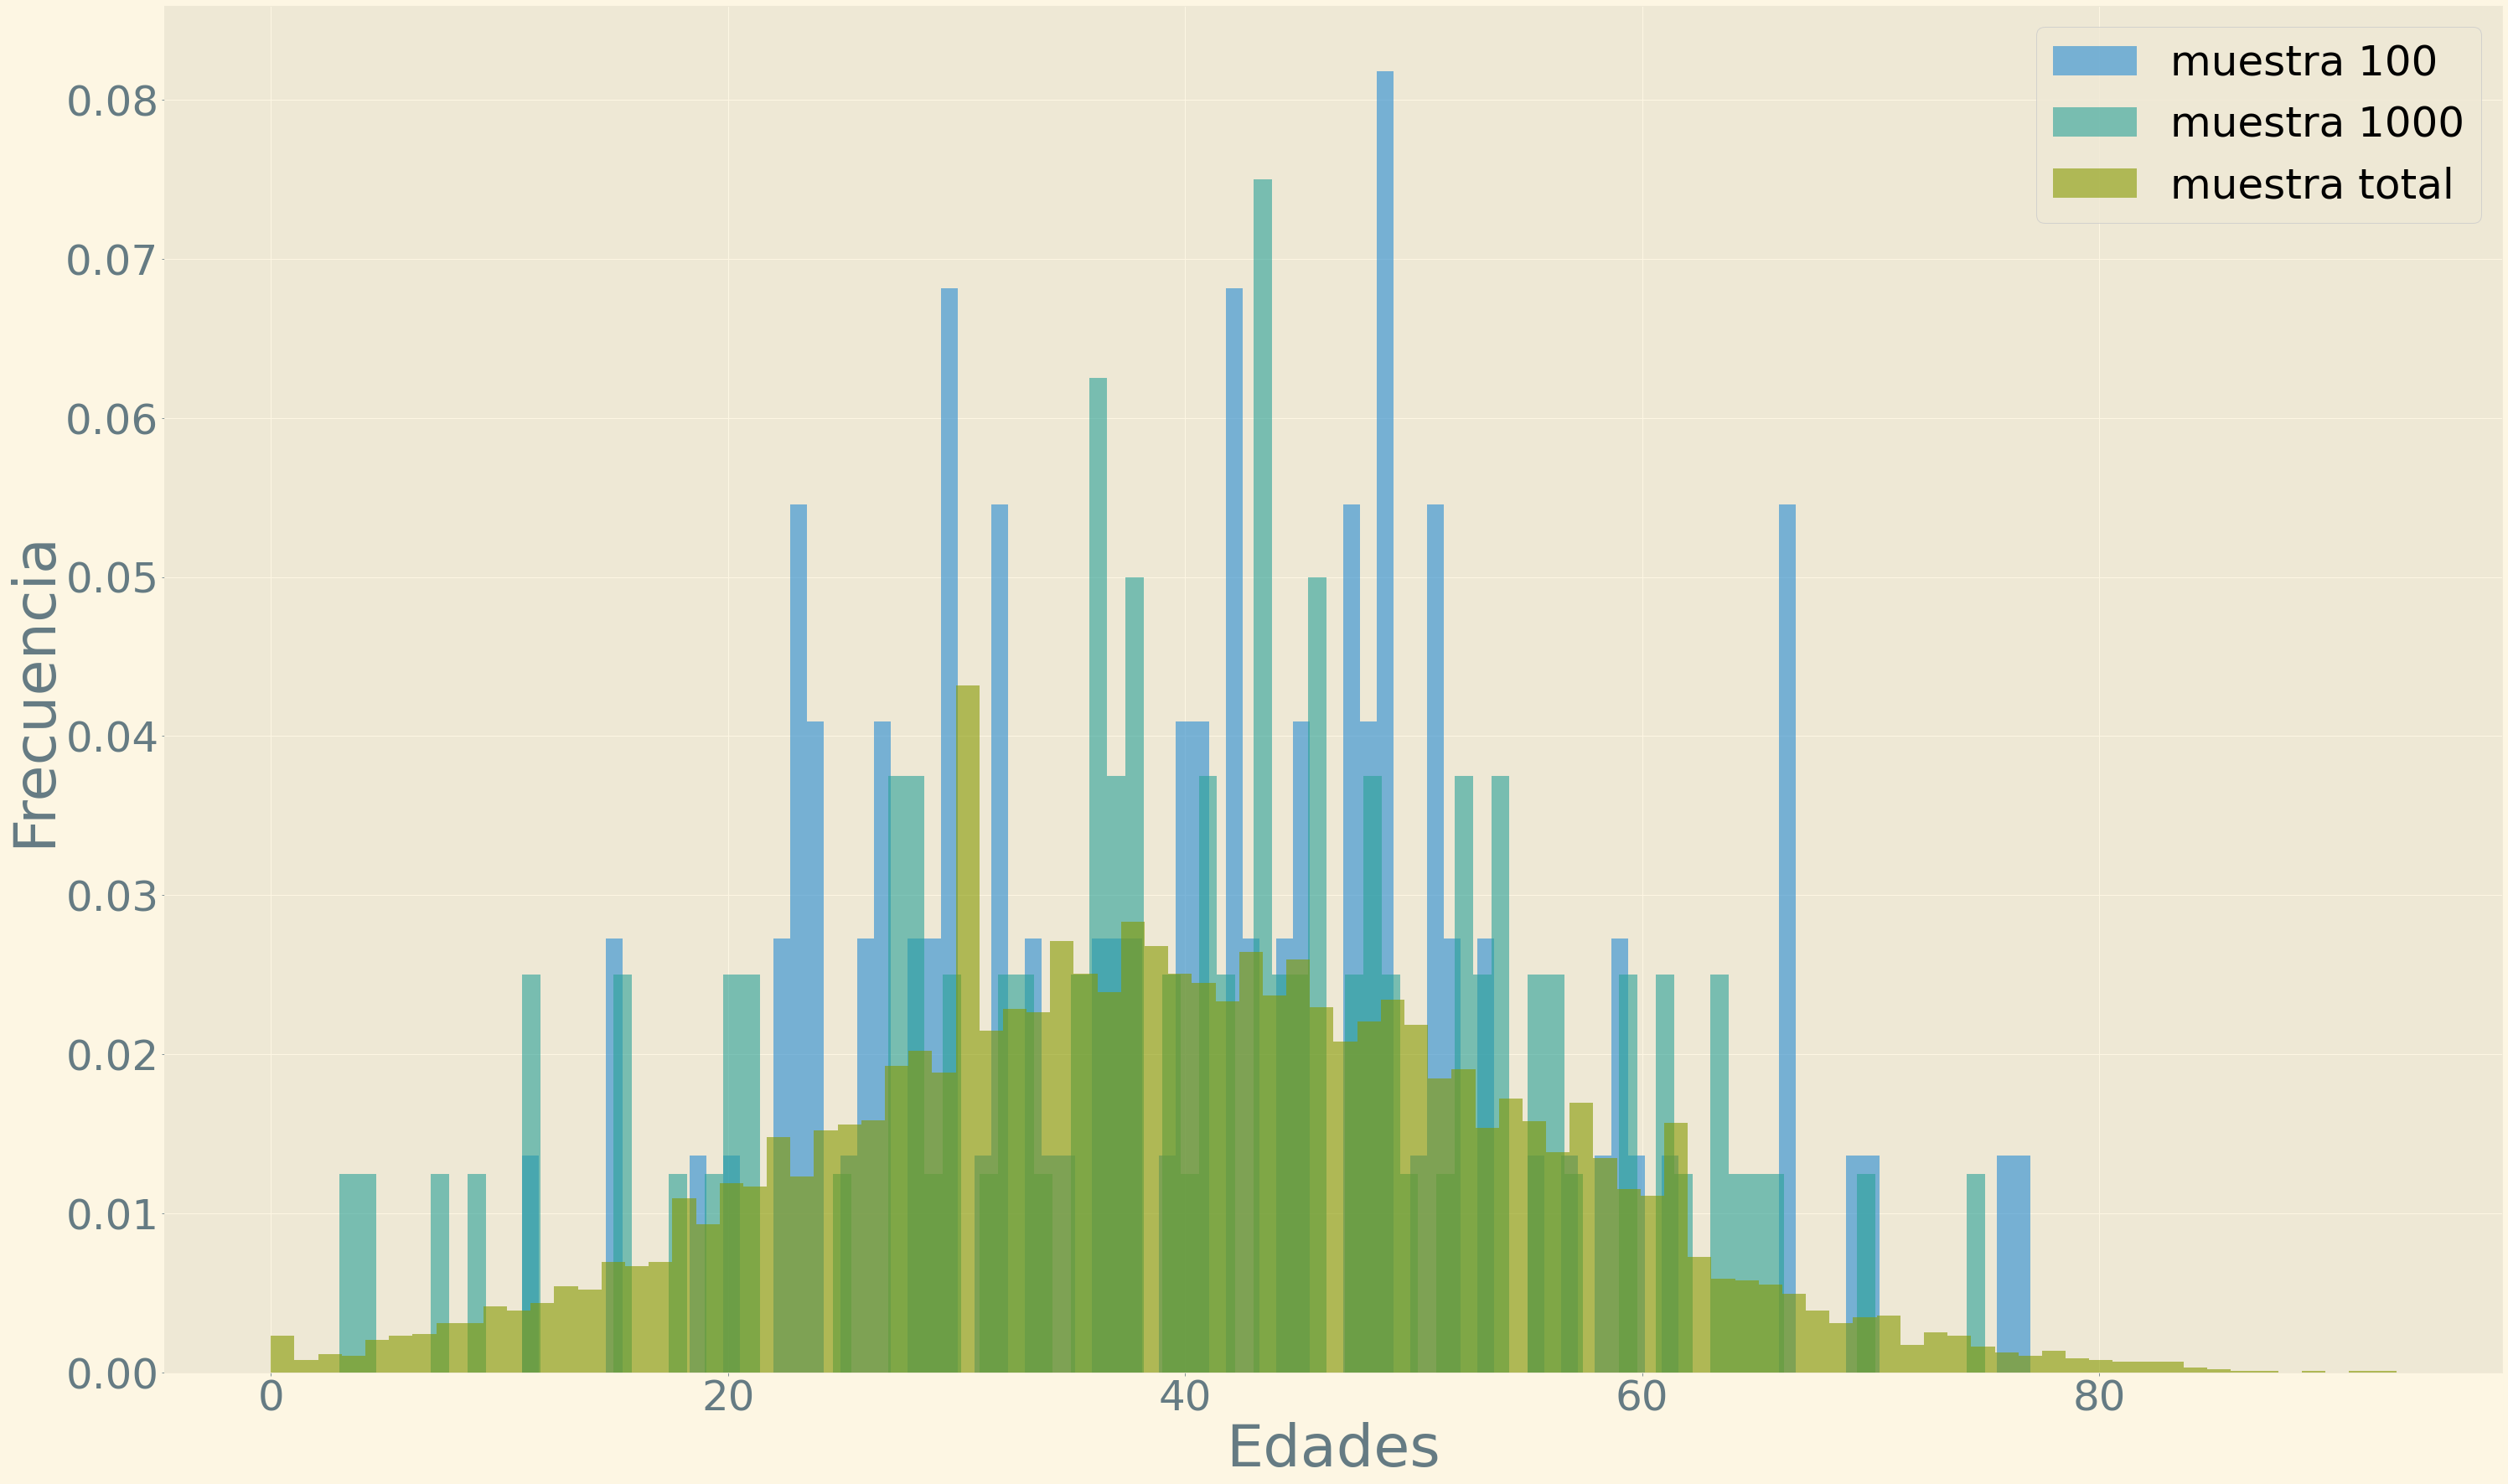

In [14]:
fig = plt.figure(figsize = (50, 30))
plt.hist(edades_n100, bins = 90, density = True, label = "muestra 100", alpha = 0.6);
plt.hist(edades_n1000, bins = 90, density = True, label = "muestra 1000", alpha = 0.6);
plt.hist(edades, bins = 90, density = True, label = "muestra total", alpha = 0.6);
plt.xlabel("Edades", fontsize = 70)
plt.xticks(fontsize = 50);
plt.ylabel("Frecuencia", fontsize = 70)
plt.yticks(fontsize = 50);
plt.legend(loc='upper right', fontsize = 50)


In [15]:
describe_edades = pd.DataFrame.describe(pd.Series(edades))
describe_muestra_100 = pd.DataFrame.describe(pd.Series(edades_n100))
describe_muestra_1000 = pd.DataFrame.describe(pd.Series(edades_n1000))
resumen = pd.concat([describe_edades, describe_muestra_1000, describe_muestra_100], axis = 1)
resumen.columns = ["Datos Totales", "Muestra 1000", "Muestra 100"]
display(resumen)

,Datos Totales,Muestra 1000,Muestra 100
count,10000.000000,100.000000,100.000000
mean,39.845300,40.340000,40.820000
std,14.752713,15.177881,14.173799
min,0.000000,3.000000,11.000000
25%,30.000000,31.750000,30.000000
50%,40.000000,41.500000,41.000000
75%,50.000000,51.250000,49.000000
max,93.000000,75.000000,77.000000


### 2. Compara extremos (min max)
EX = [], Repetir L = 100 veces:  
* Escoger una muestra de forma aleatoria  de tamano N = 100, N(L)  
* De N(L), escoger el valor más pequeno, min(N(L))  
* De N(L), escoger el valor más grande, max(N(L))  
* De N(L), calcular el valor esperado,  E(N(L))  
* Agregar a la lista EX el valor E(N(L))

In [16]:
repeticiones = 100
tamanio_muestra = 100
EX= []
MinX = []
MaxX = []
for i in range(repeticiones):
    X = np.random.choice(edades, tamanio_muestra, replace = False)
    EX.append(np.mean(X))
    MinX.append(np.min(X))
    MaxX.append(np.max(X))
    
    

<ipython-input-17-871116f2fbec>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


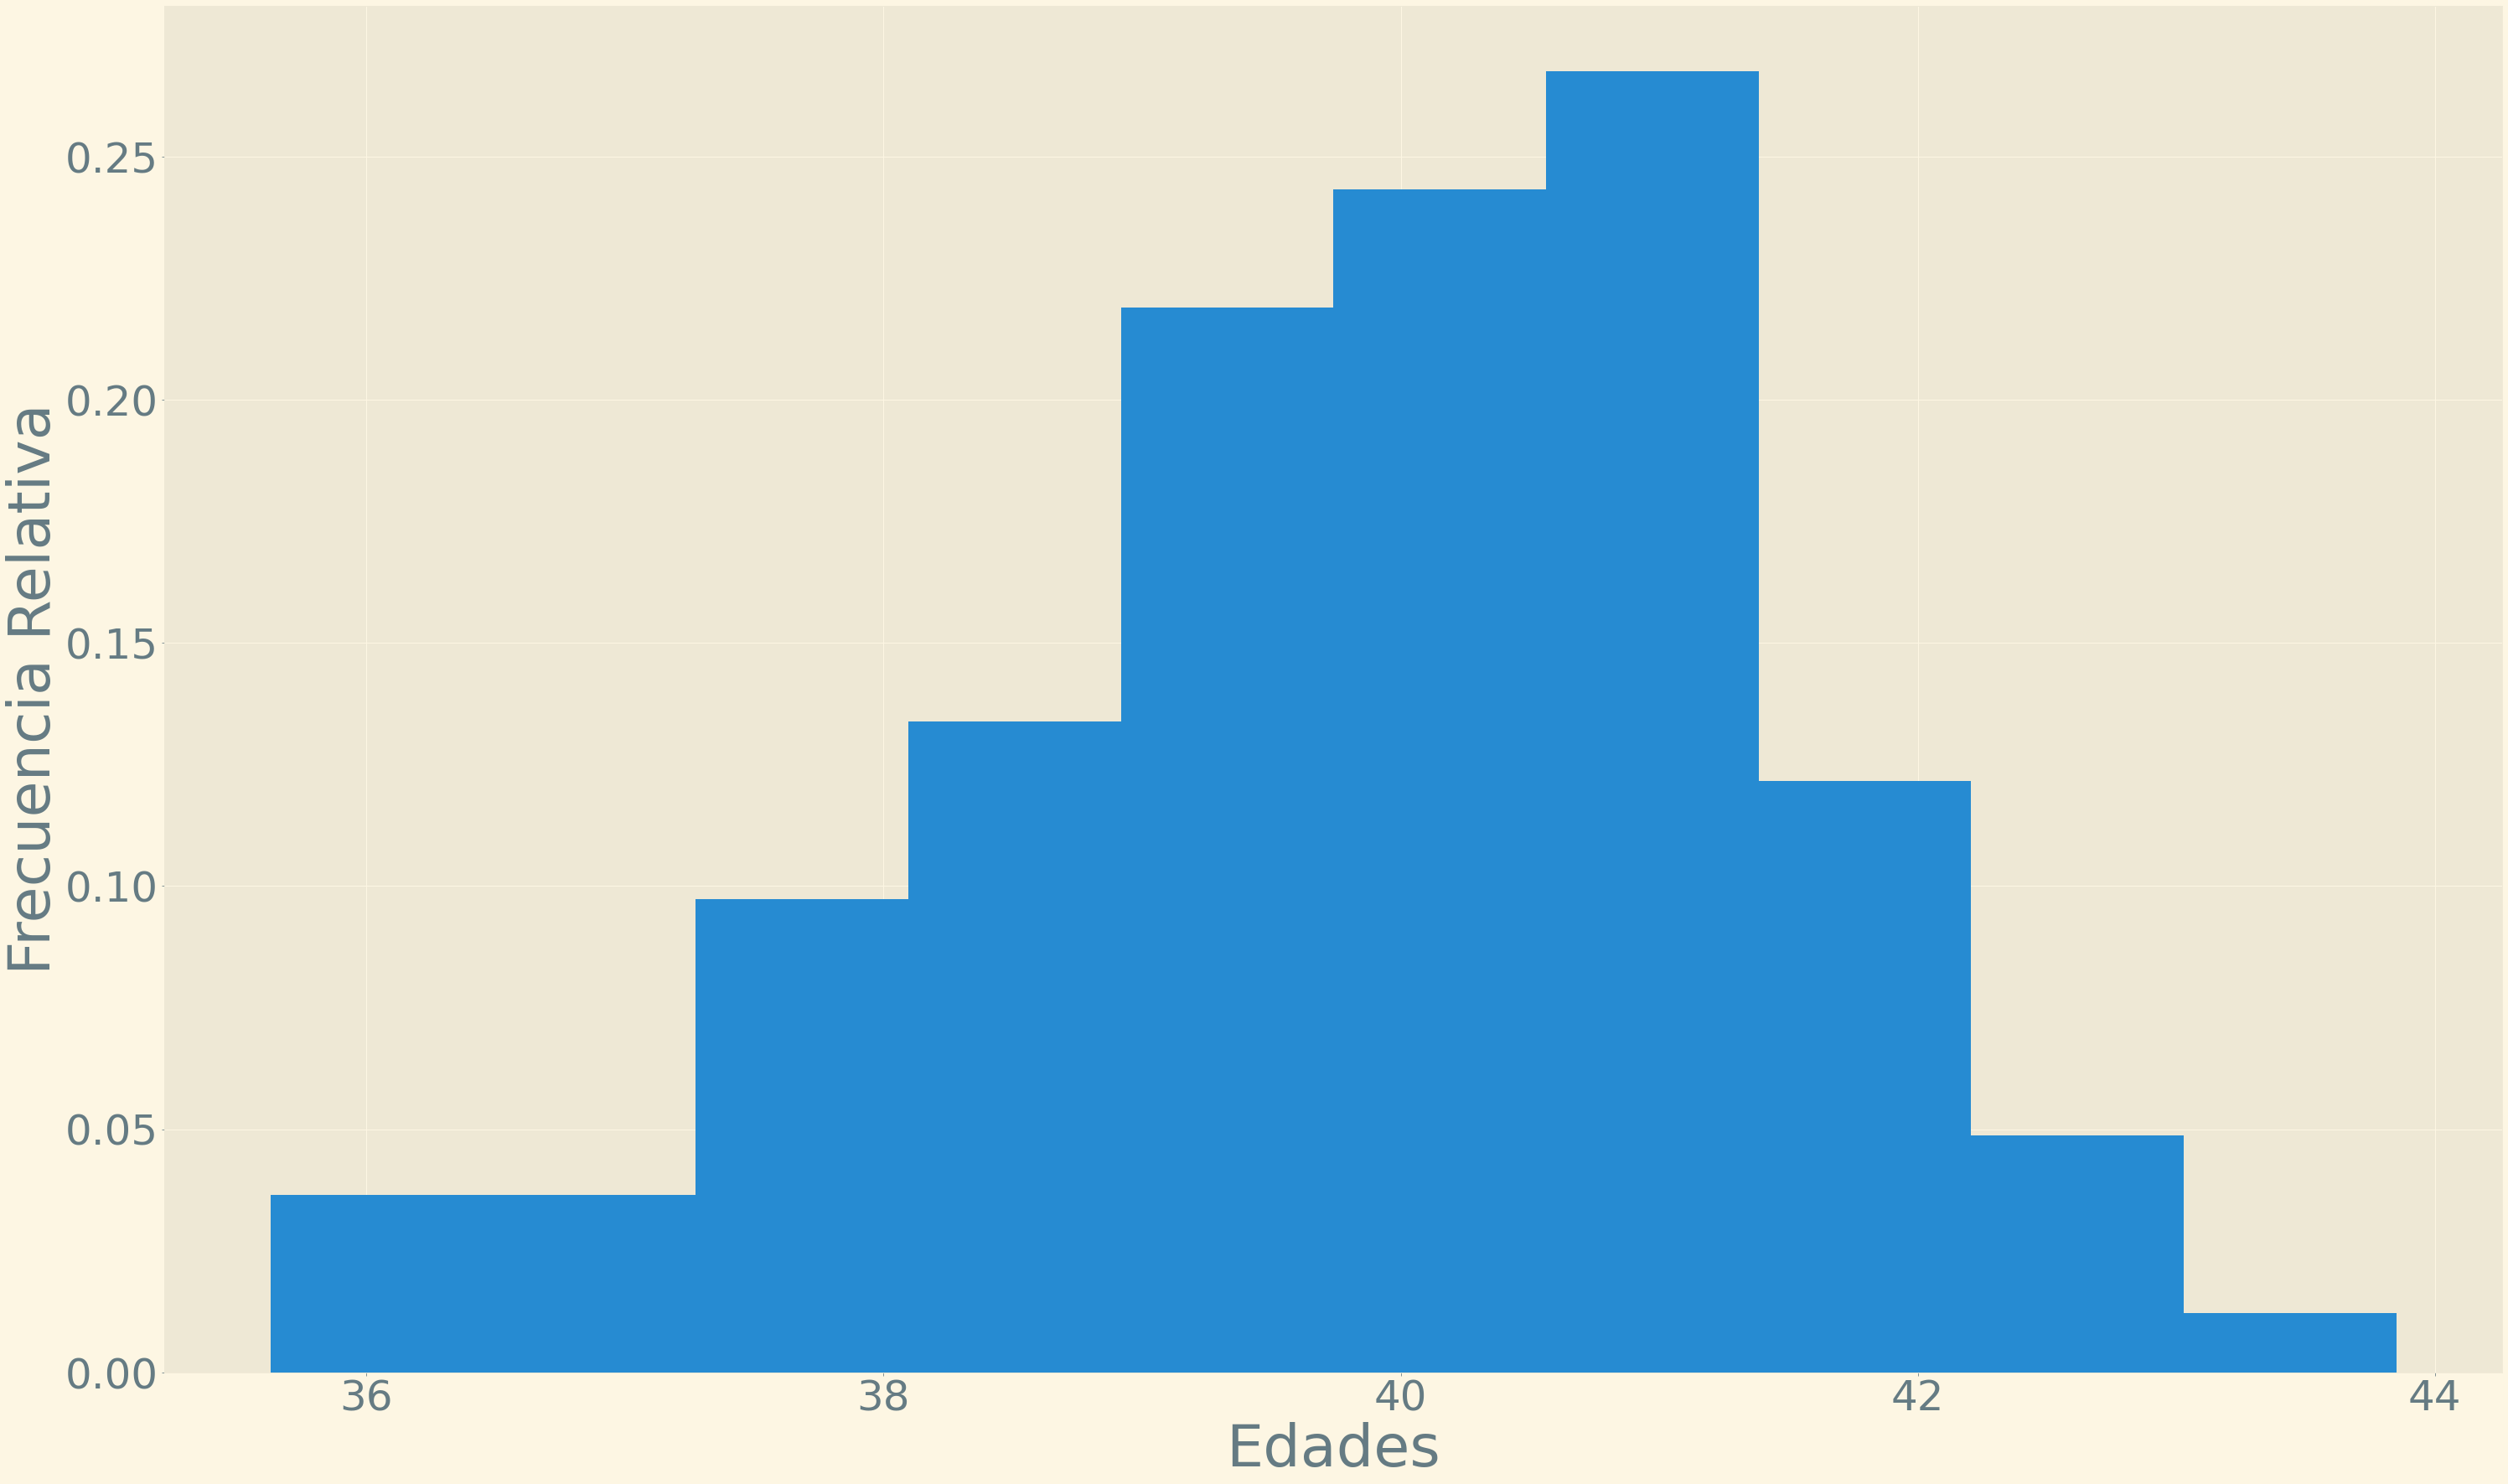

In [17]:
fig = plt.figure(figsize = (50, 30))
plt.hist(EX, bins = 10, density = True);
plt.xlabel("Edades", fontsize = 70)
plt.xticks(fontsize = 50);
plt.ylabel("Frecuencia Relativa", fontsize = 70)
plt.yticks(fontsize = 50);


fig.show();

<ipython-input-18-9067f1d6952e>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


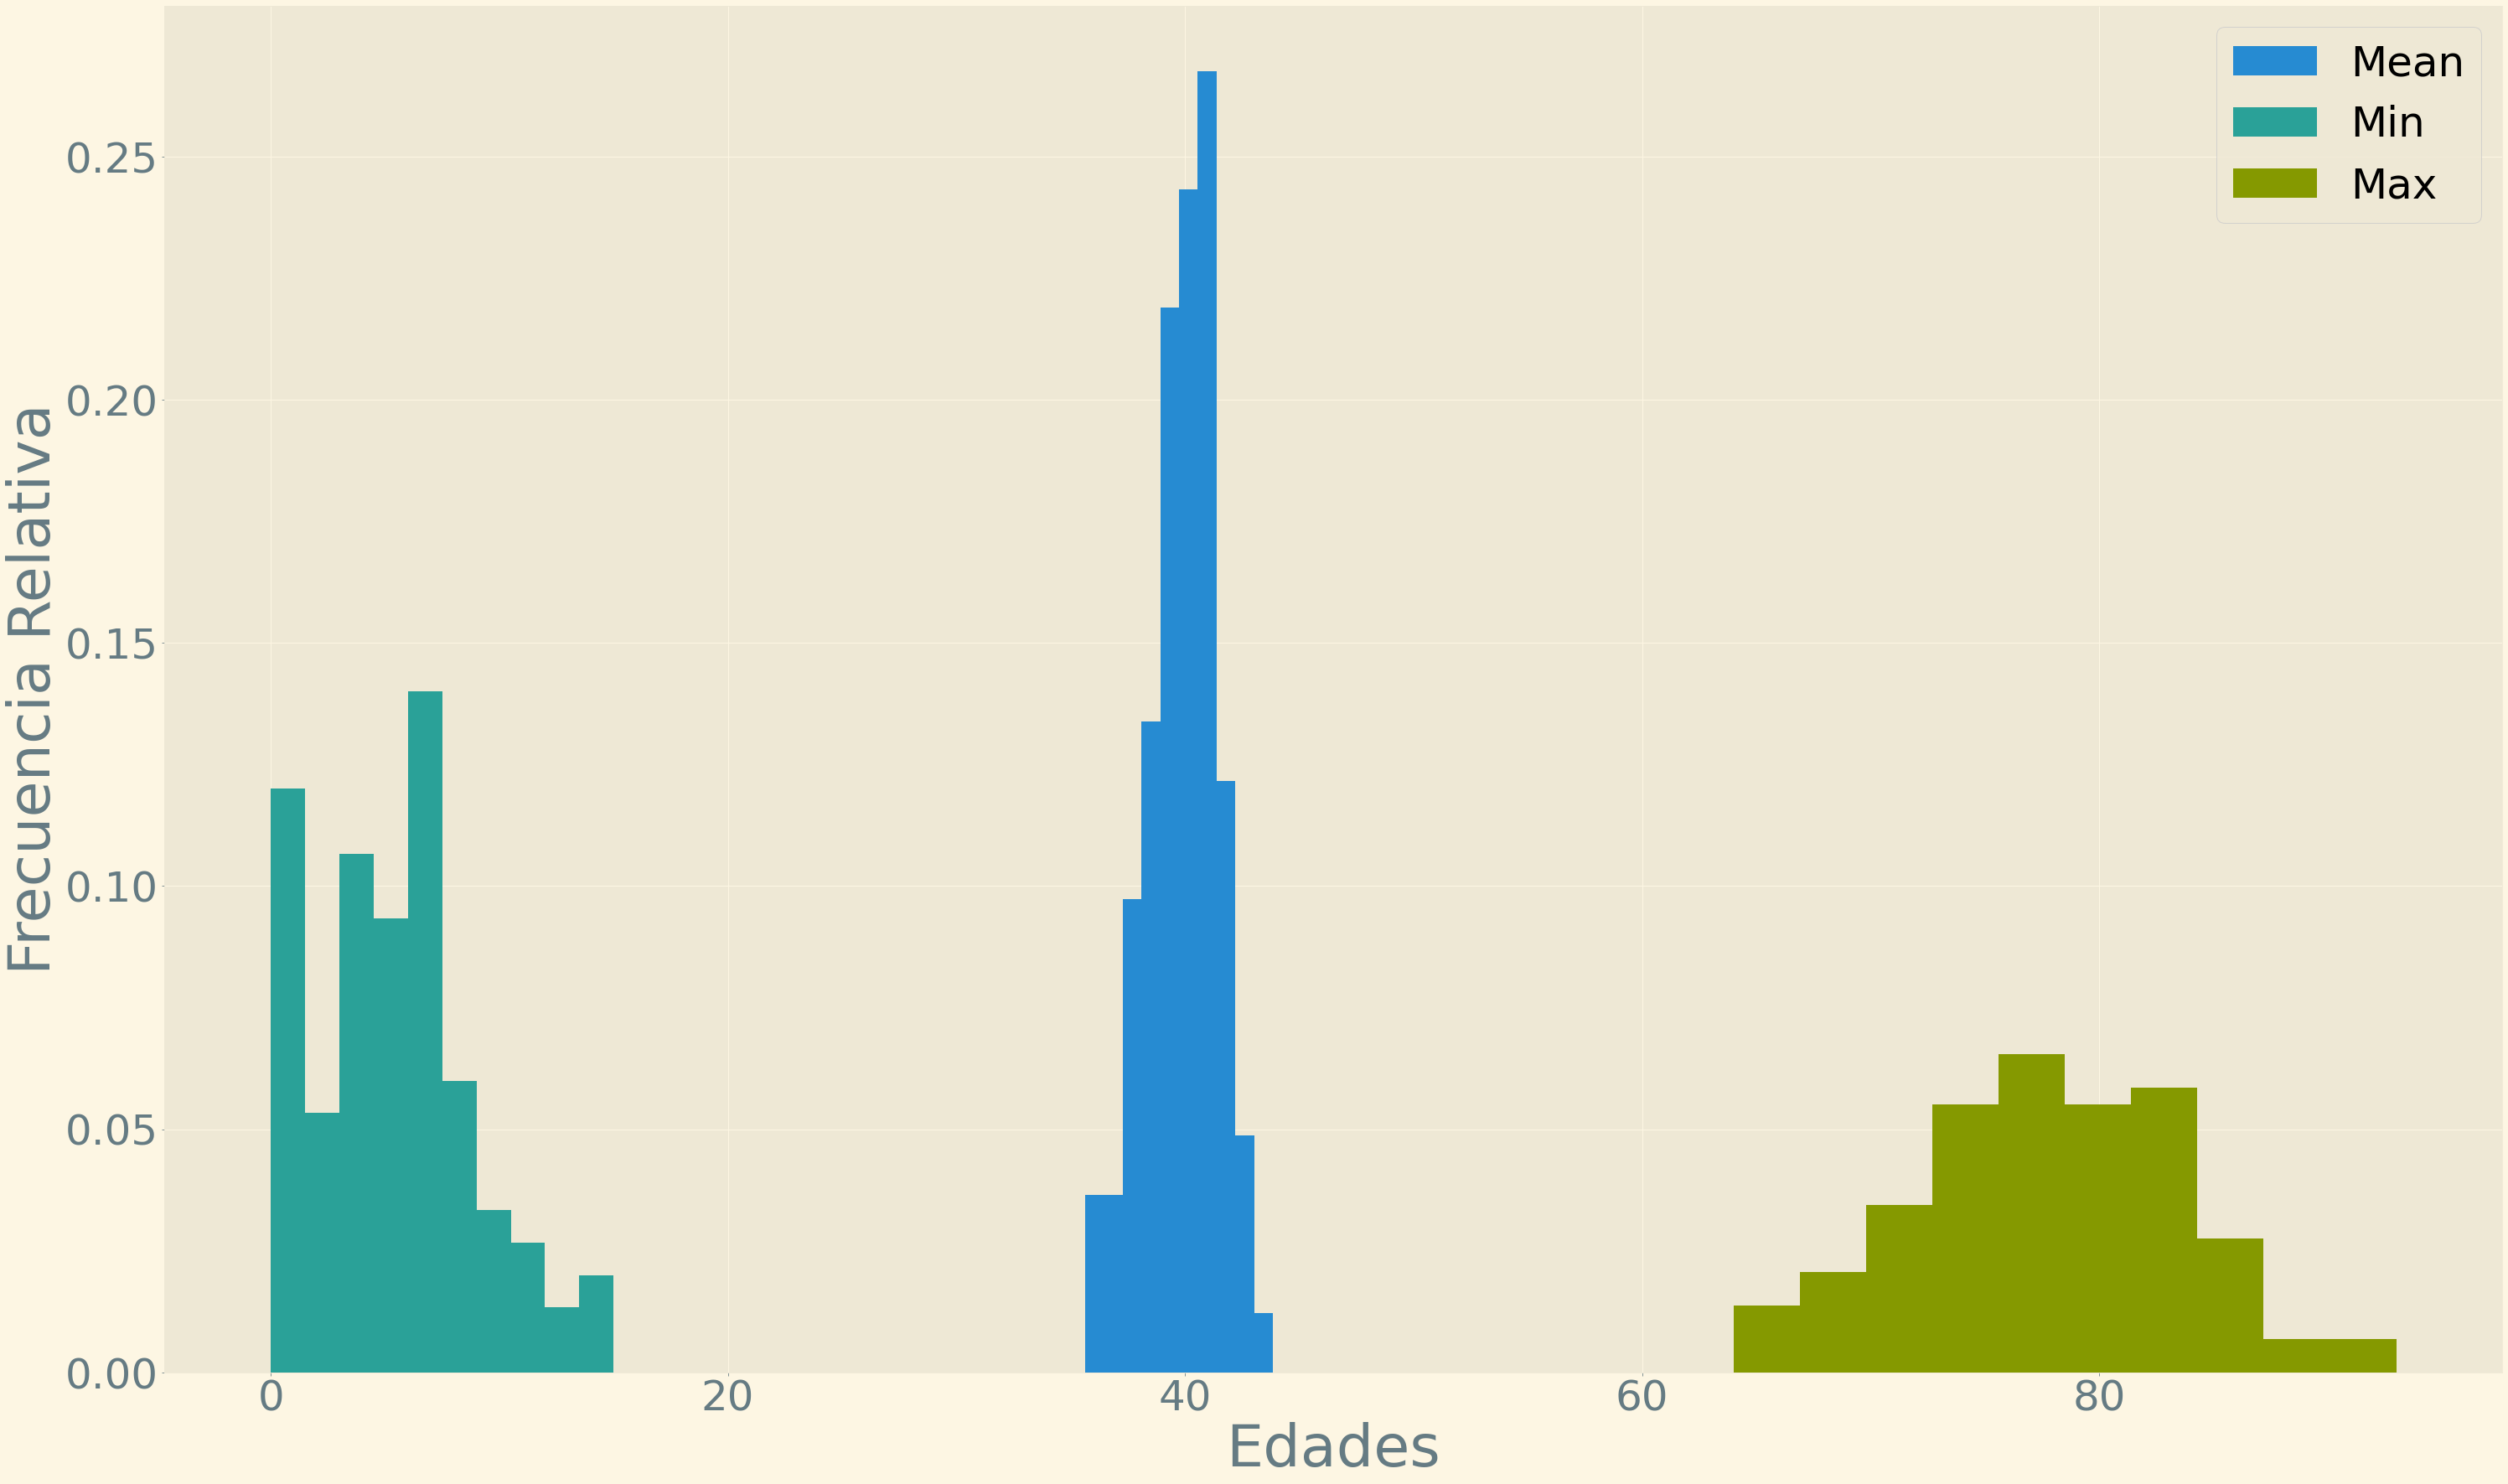

In [18]:
fig = plt.figure(figsize = (50, 30))
plt.hist(EX, bins = 10, density = True, label = "Mean");
plt.hist(MinX, bins = 10, density = True, label = "Min");
plt.hist(MaxX, bins = 10, density = True, label = "Max");

plt.xlabel("Edades", fontsize = 70)
plt.xticks(fontsize = 50);
plt.ylabel("Frecuencia Relativa", fontsize = 70)
plt.yticks(fontsize = 50);
plt.legend(loc='upper right', fontsize = 50)


fig.show();

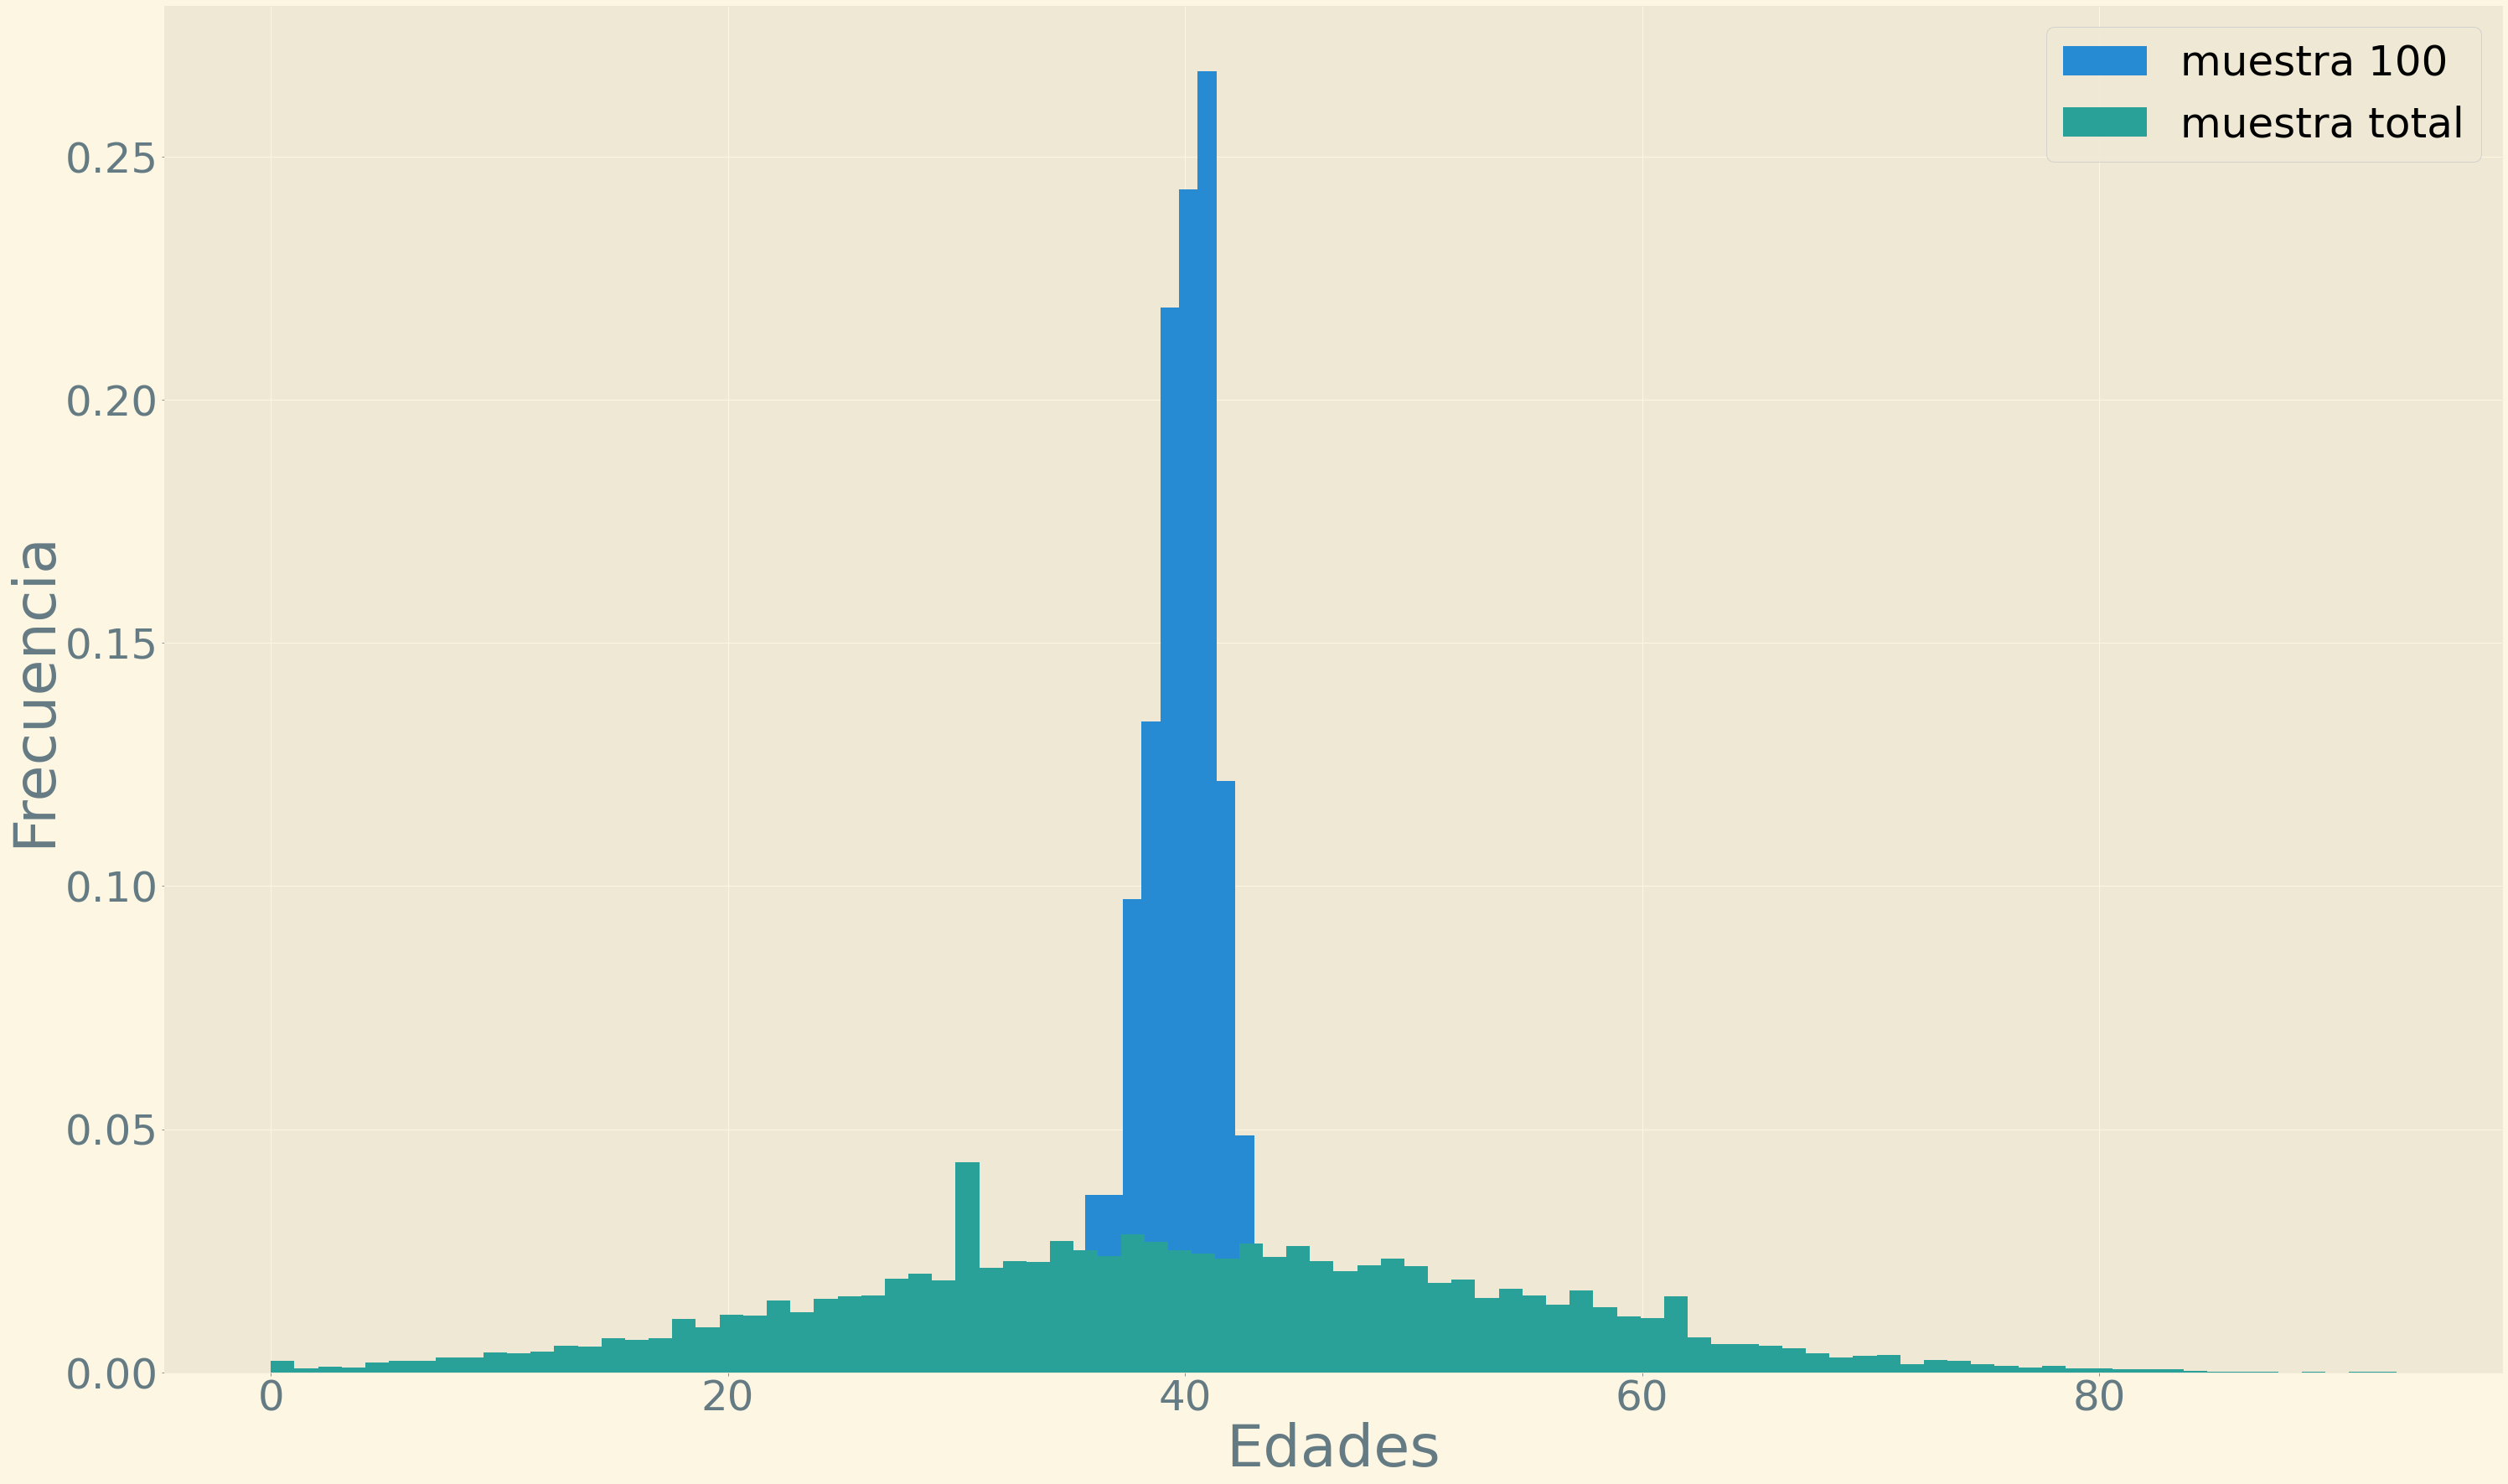

In [19]:
fig = plt.figure(figsize = (50, 30))
plt.hist(EX, bins = 10, density = True, label = "muestra 100");
plt.xlabel("Edades", fontsize = 70)
plt.xticks(fontsize = 50);
plt.ylabel("Frecuencia", fontsize = 70)
plt.yticks(fontsize = 50);
#plt.hist(edades_n1000, bins = 90, density = True, label = "muestra 1000");
plt.hist(edades, bins = 90, density = True, label = "muestra total");
plt.legend(loc='upper right', fontsize = 50)


### Conclusiones:
* El generar una muestra de 100 y 1000 observaciones en los extremos se observa un comportamiento que no es real en los mínimos y máximos
* El promedio (EX) se ve con un comportamiento que se acerca al promedio de todos mis datos
* El mínimos (MX) presenta una alta frecuencia para el 0, que en la distribución original se ve poca frecuencia, pero al compararlo con las edades mínimas próximas tiene más oportunidad de ser seleccionado en el muestreo aleatorio
* En contraste con el mínimo el máximo no llega al máximo reportado por la distribución original, y eso se debe a que la edades grandes tienen mayor frecuencia en el rango de 78 a 82 años en la distribución original y eso se observa en la distribución de los máximos.
![extremos](https://raw.githubusercontent.com/arturoTellez/Deteccion_anomalias_homework/master/tarea_muestreo/extremos.PNG)

